In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load data

In [2]:
df = pd.read_csv('data/train.csv')

df.shape

(614, 13)

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Check dataset info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Drop irrelevant columns

In [6]:
df = df.drop(['Loan_ID'], axis=1)

# Check for unique values of object columns

In [7]:
for col in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    print(f'{col} unique: {df[col].unique()}')

Gender unique: ['Male' 'Female' nan]
Married unique: ['No' 'Yes' nan]
Dependents unique: ['0' '1' '2' '3+' nan]
Education unique: ['Graduate' 'Not Graduate']
Self_Employed unique: ['No' 'Yes' nan]
Property_Area unique: ['Urban' 'Rural' 'Semiurban']
Loan_Status unique: ['Y' 'N']


# Check for NaN

In [8]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Check for duplicates

In [9]:
df.duplicated().sum()

np.int64(0)

# Replace NaN

In [10]:
for col in df.columns:
    if df[col].dtype == "object":
        mode_value = df[col].mode()[0] # use the most common value of a column
        print(f'Mode for {col}: {mode_value}')
        df[col] = df[col].fillna(mode_value) 
    else:
        median_value = df[col].median() # for numeric columns use the median
        print(f'Median for {col}: {median_value}')
        df[col] = df[col].fillna(median_value)

Mode for Gender: Male
Mode for Married: Yes
Mode for Dependents: 0
Mode for Education: Graduate
Mode for Self_Employed: No
Median for ApplicantIncome: 3812.5
Median for CoapplicantIncome: 1188.5
Median for LoanAmount: 128.0
Median for Loan_Amount_Term: 360.0
Median for Credit_History: 1.0
Mode for Property_Area: Semiurban
Mode for Loan_Status: Y


In [11]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Data histograms, density and box plots

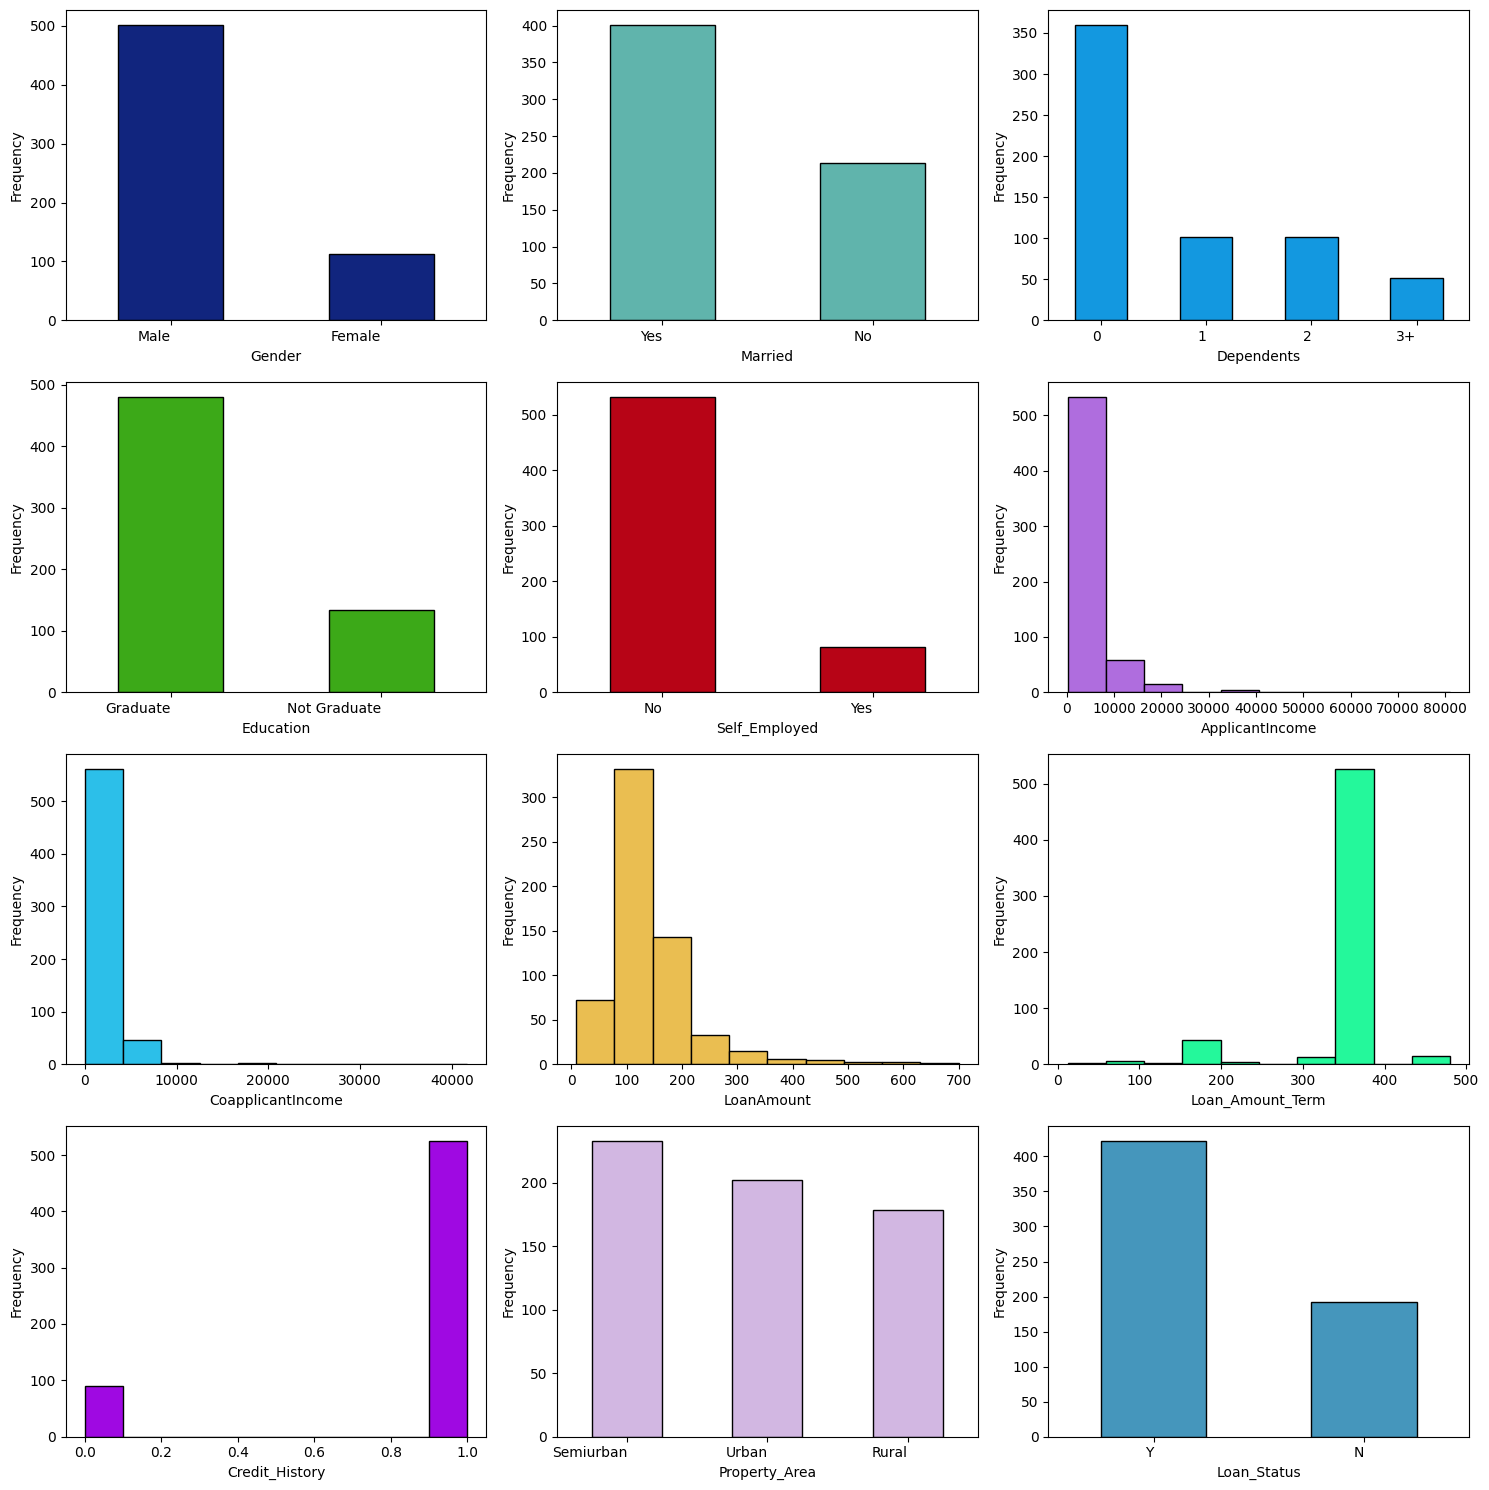

In [12]:
def random_color():
    return (np.random.random(), np.random.random(), np.random.random())

fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
ax = ax.flatten()

for idx, col in enumerate(df.columns):
    if df[col].dtype == 'object':
        counts = df[col].value_counts()
        counts.plot(kind='bar', ax=ax[idx], edgecolor="black", color=random_color())
        ax[idx].set_xlabel(col)
        ax[idx].set_ylabel('Frequency')
        ax[idx].set_xticklabels(counts.index, rotation=0, ha='right')
    else:
        df[col].plot(kind='hist', edgecolor="black", color=random_color(), ax=ax[idx])
        ax[idx].set_xlabel(col)

plt.tight_layout()
plt.show()

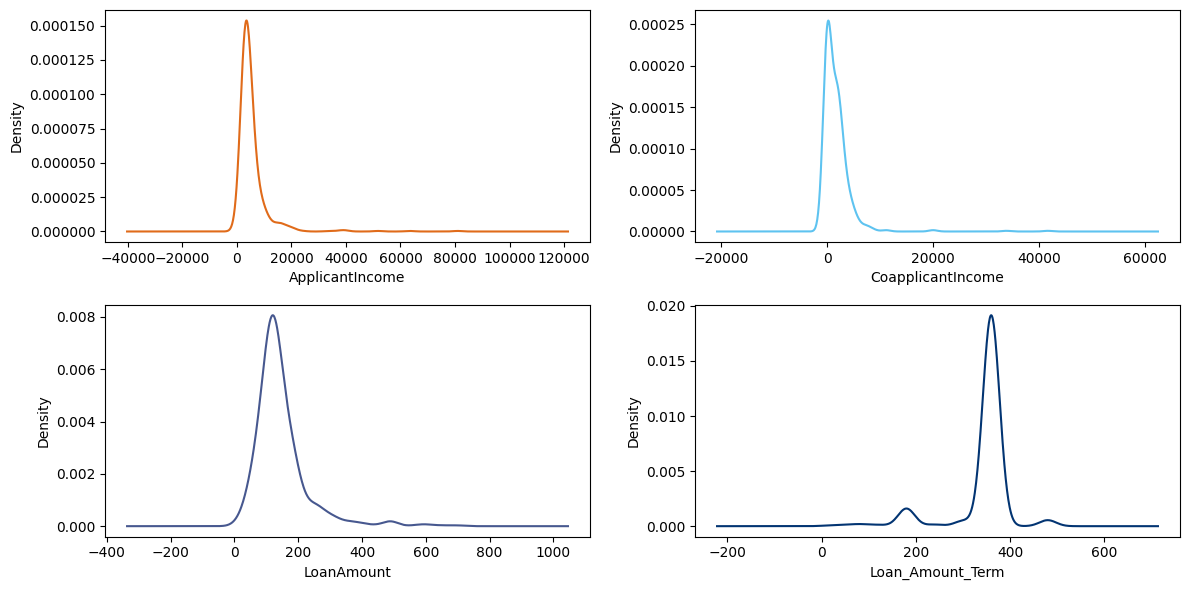

In [13]:
numeric_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
ax = ax.flatten()

for idx, col in enumerate(numeric_columns):
    df[col].plot(kind='density', color=random_color(), ax=ax[idx])
    ax[idx].set_xlabel(col)

plt.tight_layout()
plt.show()

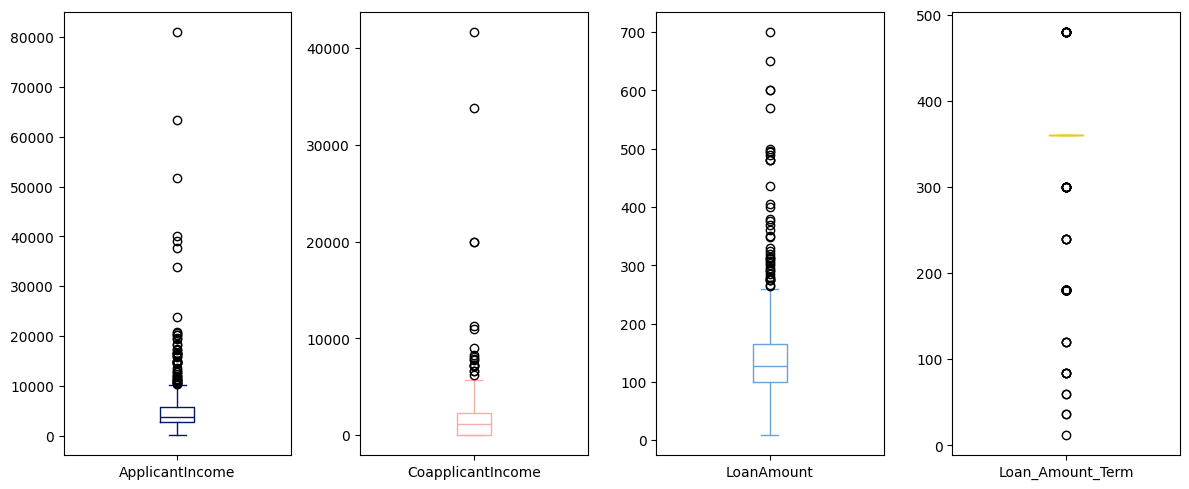

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 5))
ax = ax.flatten()

for idx, col in enumerate(numeric_columns):
    df[col].plot(kind='box', color=random_color(), ax=ax[idx])

plt.tight_layout()
plt.show()

In [15]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Converting objects to numeric columns

In [16]:
def convert_property_area(x: str) -> int:
    if x == 'Urban':
        return 0
    elif x == 'Semiurban':
        return 1
    else:
        return 2

df['Gender'] = df['Gender'].apply(lambda x: 0 if x == 'Male' else 1)
df['Married'] = df['Married'].apply(lambda x: 0 if x == 'No' else 1)
df['Dependents'] = df['Dependents'].apply(lambda x: 3 if x == '3+' else int(x))
df['Education'] = df['Education'].apply(lambda x: 0 if x == 'Not Graduate' else 1)
df['Self_Employed'] = df['Self_Employed'].apply(lambda x: 0 if x == 'No' else 1)
df['Property_Area'] = df['Property_Area'].apply(convert_property_area)
df['Loan_Status'] = df['Loan_Status'].apply(lambda x: 0 if x == 'N' else 1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,0,1
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1


# Scatterplots, heatmap, pairplot

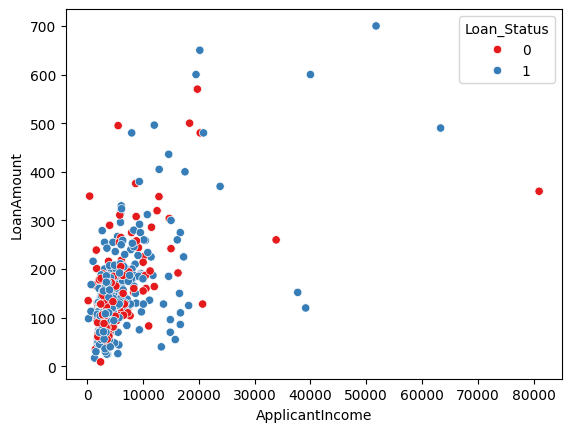

In [17]:
sns.scatterplot(data=df, x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', palette='Set1')
plt.show()

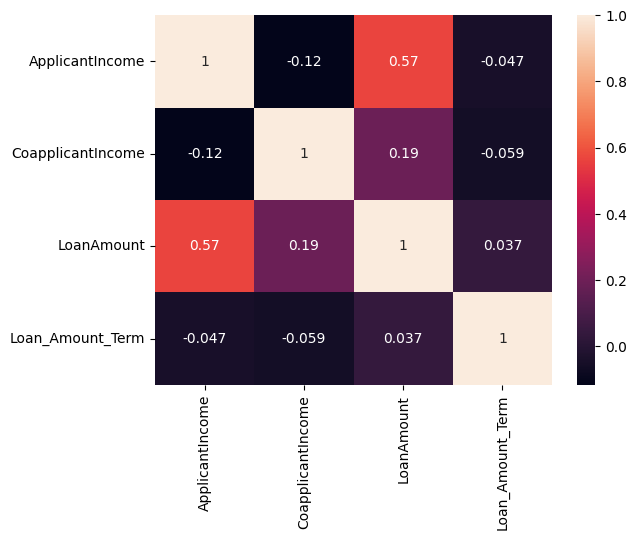

In [18]:
corr = df[numeric_columns].corr()
sns.heatmap(corr, annot=True)
plt.show()

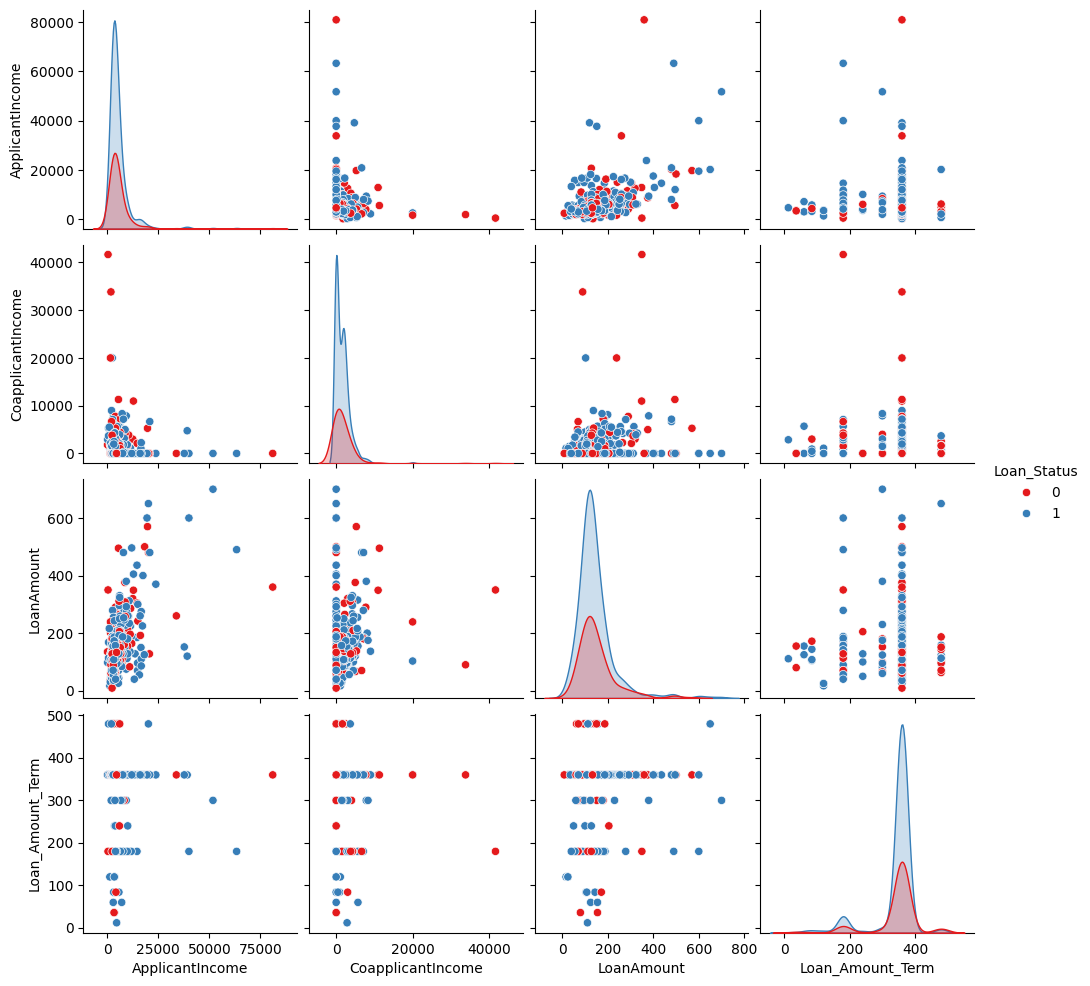

In [19]:
sns.pairplot(data=df[numeric_columns + ['Loan_Status']], hue='Loan_Status', palette='Set1')
plt.show()

# Data preprocessing

In [20]:
X = df.drop('Loan_Status', axis=1).to_numpy(dtype=np.float32)
y = df['Loan_Status'].to_numpy(dtype=np.float32)

print(f'X shape: {X.shape}, y shape: {y.shape}')

X shape: (614, 11), y shape: (614,)


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% train, 20% test
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (491, 11), y_train shape: (491,)
X_test shape: (123, 11), y_test shape: (123,)


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 0.25, 0.5, 0.75, 1],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'degree': [2, 3, 4],
    #'class_weight': [None, 'balanced'],
    #'tol': [1e-4, 1e-3],
}

model = SVC()

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the scaled training data
grid_search.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 0.8065759637188208


In [24]:
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Score:", test_score)

Test Score: 0.8211382113821138
